In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
data = pd.read_csv("/Users/ivyadiele/Downloads/AmesHousing.csv.xls")

In [7]:
df = pd.DataFrame(data)

df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [19]:
missing_values = df.isnull().sum().sort_values(ascending = False)
print (missing_values[missing_values > 0])

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
dtype: int64


In [21]:
df.fillna(df.median(numeric_only = True), inplace = True)

df.fillna("Unknown", inplace = True)

In [27]:
duplicates = df.duplicated().sum()
print (f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


In [31]:
df['Year Built'] = pd.to_numeric(df['Year Built'], errors = 'coerce')
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors ='coerce')

In [37]:
df.drop(["Alley"], axis=1, inplace = True)

In [39]:
correlation = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
print(correlation.head(15))

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647812
Garage Area       0.640381
Total Bsmt SF     0.632164
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.508882
Mas Vnr Area      0.502196
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432862
Name: SalePrice, dtype: float64


In [49]:
df["Total SF"] = df["Total Bsmt SF"] + df["1st Flr SF"] + df["2nd Flr SF"]

In [51]:
df["House Age"] = df["Yr Sold"] - df["Year Built"]

df["Is Remodeled"] = (df["Year Built"] != df["Year Remod/Add"]).astype(int)

In [53]:
df = pd.get_dummies(df, drop_first=True)

In [67]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print (f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (2344, 280), Testing Set: (586, 280)


In [69]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [81]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [83]:
print (f"R2 Score: {r2: .2f}")
print (f"Mean Absoulte Erroe (MAE): {mae: .2f}")

R2 Score:  0.85
Mean Absoulte Erroe (MAE):  16412.44


In [93]:
feature_importance = np.abs(model.coef_)
feature_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_df = feature_df.sort_values(by = "Importance", ascending = False)

print (feature_df.head(10))

               Feature     Importance
122  Roof Matl_Membran  754655.922710
127  Roof Matl_WdShngl  740737.573106
123    Roof Matl_Metal  735311.046772
124     Roof Matl_Roll  694184.205539
126  Roof Matl_WdShake  692261.724458
125  Roof Matl_Tar&Grv  688700.141905
121  Roof Matl_CompShg  688327.101494
262  Misc Feature_Othr  563224.532957
261  Misc Feature_Gar2  543422.106902
263  Misc Feature_Shed  542047.146949


In [129]:
top_features = feature_df["Feature"].head(50).tolist()

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [131]:
optimized_model = LinearRegression()
optimized_model.fit(X_train_selected, y_train)

y_pred_optimized = optimized_model.predict(X_test_selected)

In [133]:
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimzied = mean_absolute_error(y_test, y_pred_optimized)

In [135]:
print (f"Optimized R2 Score: {r2_optimized: .2f}")

Optimized R2 Score:  0.61


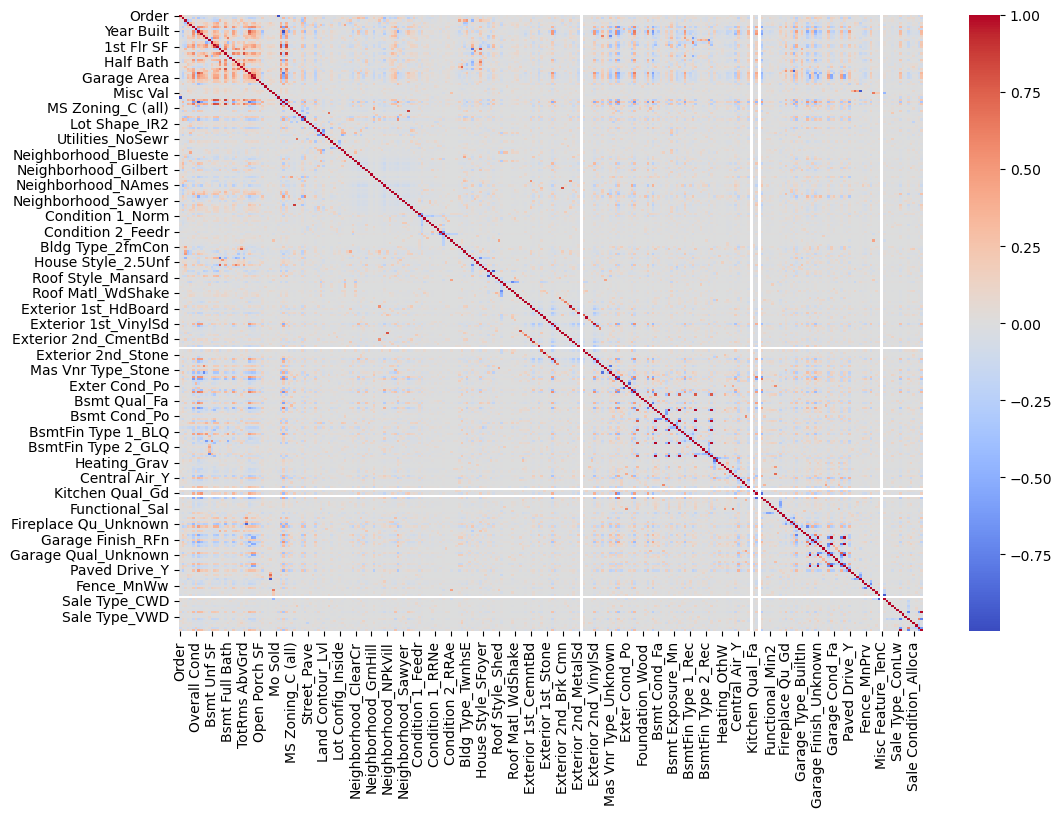

In [139]:
corr_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()

In [145]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R² Score: {r2_ridge:.2f}")

Ridge Regression R² Score: 0.89


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.54347e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
